### Field of View Simulator

Show how to a microscope field of view with many microtubules.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from pathlib import Path
import sys
sys.path.append("../")

import anamic

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Common Parameters
pixel_size = 110  # nm/pixel
image_size_pixel = 512

# Per image parameters
image_parameters = {}
image_parameters['n_mt'] = {}
image_parameters['n_mt']['values'] = np.arange(80, 120)
image_parameters['n_mt']['prob'] = 'uniform'

image_parameters['signal_mean'] = {}
image_parameters['signal_mean']['values'] = {'loc': 700, 'scale': 10}
image_parameters['signal_mean']['prob'] = 'normal'

image_parameters['signal_std'] = {}
image_parameters['signal_std']['values'] = {'loc': 100, 'scale': 1}
image_parameters['signal_std']['prob'] = 'normal'

image_parameters['bg_mean'] = {}
image_parameters['bg_mean']['values'] = {'loc': 500, 'scale': 10}
image_parameters['bg_mean']['prob'] = 'normal'

image_parameters['bg_std'] = {}
image_parameters['bg_std']['values'] = {'loc': 24, 'scale': 1}
image_parameters['bg_std']['prob'] = 'normal'

image_parameters['noise_factor'] = {}
image_parameters['noise_factor']['values'] = {'loc': 1, 'scale': 0.1}
image_parameters['noise_factor']['prob'] = 'normal'
image_parameters['noise_factor']['values'] = [0.5]
image_parameters['noise_factor']['prob'] = [1]

image_parameters['mask_line_width'] = 4  # pixel
image_parameters['mask_backend'] = 'skimage'

# Per microtubule parameters.
microtubule_parameters = {}

microtubule_parameters['n_pf'] = {}
microtubule_parameters['n_pf']['values'] = [11, 12, 13, 14, 15]
microtubule_parameters['n_pf']['prob'] = [0.05, 0.05, 0.3, 0.1, 0.5]

microtubule_parameters['mt_length_nm'] = {}
microtubule_parameters['mt_length_nm']['values'] = np.arange(500, 10000)
microtubule_parameters['mt_length_nm']['prob'] = 'uniform'

microtubule_parameters['taper_length_nm'] = {}
microtubule_parameters['taper_length_nm']['values'] = np.arange(0, 1000)
microtubule_parameters['taper_length_nm']['prob'] = 'uniform'

microtubule_parameters['labeling_ratio'] = {}
microtubule_parameters['labeling_ratio']['values'] = [0.08, 0.09, 0.10, 0.11, 0.12, 0.13]
microtubule_parameters['labeling_ratio']['prob'] = 'uniform'

microtubule_parameters['pixel_size'] = pixel_size  # nm/pixel
microtubule_parameters['x_offset'] = 2000  # nm
microtubule_parameters['y_offset'] = 2000  # nm
microtubule_parameters['psf_size'] = 135  # nm

image, masks, mts = anamic.simulator.create_fov(image_size_pixel, pixel_size, microtubule_parameters, image_parameters, return_positions=True)

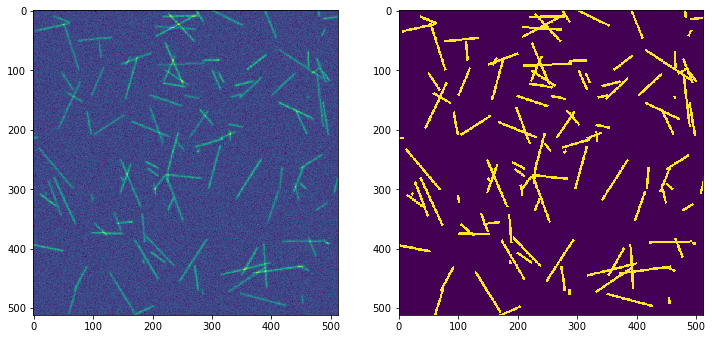

In [3]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

im = axs[0].imshow(image)
#fig.colorbar(im, ax=axs[0])
axs[1].imshow(masks.max(axis=0))